### <span style="color:#20B2AA"> Máster en Tecnologías de Análisis de Datos Masivos: Big Data
***
Minería de datos                                                                 <br>
Profesor: Juan Carlos Vidal Aguiar                                                                                  <br>
Práctica 1                                                                                                              <br>
<br>
Alumna: Irlui Ramírez Hernández                                                                                           <br>
Febrero 2023                                                                                                                <br> 
******* 

#### <span style="color:#20B2AA">   Librerías a implementar           <br>

***

In [7]:
!pip install missingno

In [ ]:
from import _arpack

SyntaxError: invalid syntax (3311833892.py, line 1)

In [ ]:
import math
import pandas as pd
import numpy as np
import missingno as mi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

ImportError: DLL load failed while importing _arpack: No se encontró el proceso especificado.

In [ ]:
import scipy
print(scipy.__version__)


1.7.3


#### <span style="color:#20B2AA">   Extracción de los datos del fichero echocardiogram.data           <br>
1. Importar la tabla correctamente. Esto implica que las columnas deben tener definidas 
correctamente su nombre y tipo de dato. Se debe mostrar la estructura de la tabla. 
• Los nombres de las columnas mencionadas en el fichero echocardiogram.names 
deben tener los siguientes nombres: Survival, StillAlive, AgeAttack, PericardEffu, 
FracShort, EPSS, LVDD, WMS, WMI, Mult, Name, Group, AliveAt1. 
2. Generar un fichero en formato CSV con la tabla importada y transformada 
correctamente. La tabla tendrá el mismo nombre y la extensión será CSV. El fichero 
creado se deberá entregar junto con la memoria. 
***

##### <span style="color:#20B2AA">Pasos:           <br>
Paso 1: "Nombramos las columnas"    <br>
Paso 2: "Cargar los datos del archivo .date con la librería Pandas"    <br>
Paso 3: "Asignamos las columnas al dataframe datos"    <br>

In [ ]:
usercols = ["Survival", "StillAlive", "AgeAttack", "PericardEffu", 
"FracShort", "EPSS", "LVDD", "WMS", "WMI", "Mult", "Name", "Group", "AliveAt1"]
datos = pd.read_csv("C:/Users/Irlui ma/OneDrive - Universidade de Santiago de Compostela/Documentos/Máster BD USC/Minería de Datos/practica1/echocardiogram.data", header = None)
datos.columns = usercols

##### <span style="color:#20B2AA">Pasos:           <br>
Paso 4: "Generamos un archivo .csv con el nombre echocardiogram y mostramos el dataframe"    <br>

In [ ]:
datos.to_csv("C:/Users/Irlui ma/OneDrive - Universidade de Santiago de Compostela/Documentos/Máster BD USC/Minería de Datos/practica1/echocardiogram.csv")
datos.head()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [ ]:
### Conversión de tipos

ValueError: invalid literal for int() with base 10: '?'

#### <span style="color:#20B2AA">   Análisis de los datos           <br>
3. Mostrar la distribución de los valores ausentes tanto por columnas como por filas, en el 
caso de que existan, tanto a través de una salida de texto como a través de
representaciones gráficas. 
4. De acuerdo con la información suministrada, calcula los valores ausentes de la columna 
de clasificación (la última). 
***

##### <span style="color:#20B2AA">Mostrar la distribución de los  datos ausentes:           <br>
Para los datos ausentes sustituimos el ? por datos ausentes representados por nan para que calcular la distribución    <br>

In [ ]:
datos = datos.replace('?', math.nan)
datos

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,NaN,NaN
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,NaN,NaN
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,NaN,NaN
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,NaN,NaN


In [ ]:
datos['StillAlive'] = datos['StillAlive'].astype('Int64')
datos['Group'] = datos['Group'].astype('Int64')
datos['StillAlive'] = datos['StillAlive'].astype('boolean')
datos['Group'] = datos['Group'].astype('boolean')
datos['PericardEffu'] = datos['PericardEffu'].astype('Int64')
datos['AliveAt1'].mask(datos['AliveAt1'] == 0, 'FALLECE', inplace=True)
datos['AliveAt1'].mask(datos['AliveAt1'] == 1, 'VIVE', inplace=True)
datos['AliveAt1'] = datos['AliveAt1'].astype('category')
datos

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71,0,0.260,9.000,4.600,14.0,1.000,1.000,name,True,0
1,19.0,False,72,0,0.380,6.000,4.100,14.0,1.700,0.588,name,True,0
2,16.0,False,55,0,0.260,4.000,3.420,14.0,1.000,1.000,name,True,0
3,57.0,False,60,0,0.253,12.062,4.603,16.0,1.450,0.788,name,True,0
4,19.0,True,57,0,0.160,22.000,5.750,18.0,2.250,0.571,name,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,True,64,0,0.240,12.900,4.720,12.0,1.000,0.857,name,<NA>,NaN
128,41.0,False,64,0,0.280,5.400,5.470,11.0,1.100,0.714,name,<NA>,NaN
129,36.0,False,69,0,0.200,7.000,5.050,14.5,1.210,0.857,name,<NA>,NaN
130,22.0,False,57,0,0.140,16.100,4.360,15.0,1.360,0.786,name,<NA>,NaN


In [ ]:
datos['Survival'] = datos['Survival'].astype('float')
datos['FracShort'] = datos['FracShort'].astype('float')
datos['EPSS'] = datos['EPSS'].astype('float')
datos['LVDD'] = datos['LVDD'].astype('float')
datos['WMS'] = datos['WMS'].astype('float')
datos['WMI'] = datos['WMI'].astype('float')
datos['Mult'] = datos['Mult'].astype('float')
datos['Name'] = datos['Name'].astype('str')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survival      130 non-null    float64
 1   StillAlive    131 non-null    boolean
 2   AgeAttack     127 non-null    object 
 3   PericardEffu  131 non-null    Int64  
 4   FracShort     124 non-null    float64
 5   EPSS          117 non-null    float64
 6   LVDD          121 non-null    float64
 7   WMS           128 non-null    float64
 8   WMI           131 non-null    float64
 9   Mult          128 non-null    float64
 10  Name          132 non-null    object 
 11  Group         110 non-null    boolean
 12  AliveAt1      74 non-null     object 
dtypes: Int64(1), boolean(2), float64(7), object(3)
memory usage: 12.1+ KB


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survival      130 non-null    float64 
 1   StillAlive    131 non-null    boolean 
 2   AgeAttack     127 non-null    object  
 3   PericardEffu  131 non-null    Int64   
 4   FracShort     124 non-null    float64 
 5   EPSS          117 non-null    float64 
 6   LVDD          121 non-null    float64 
 7   WMS           128 non-null    float64 
 8   WMI           131 non-null    float64 
 9   Mult          128 non-null    float64 
 10  Name          132 non-null    object  
 11  Group         110 non-null    boolean 
 12  AliveAt1      74 non-null     category
dtypes: Int64(1), boolean(2), category(1), float64(7), object(2)
memory usage: 11.3+ KB


In [ ]:
datos

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,11.0,False,71.0,0,0.260,9.000,4.600,14.0,1.000,1.000,name,True,0
1,19.0,False,72.0,0,0.380,6.000,4.100,14.0,1.700,0.588,name,True,0
2,16.0,False,55.0,0,0.260,4.000,3.420,14.0,1.000,1.000,name,True,0
3,57.0,False,60.0,0,0.253,12.062,4.603,16.0,1.450,0.788,name,True,0
4,19.0,True,57.0,0,0.160,22.000,5.750,18.0,2.250,0.571,name,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7.5,True,64.0,0,0.240,12.900,4.720,12.0,1.000,0.857,name,<NA>,NaN
128,41.0,False,64.0,0,0.280,5.400,5.470,11.0,1.100,0.714,name,<NA>,NaN
129,36.0,False,69.0,0,0.200,7.000,5.050,14.5,1.210,0.857,name,<NA>,NaN
130,22.0,False,57.0,0,0.140,16.100,4.360,15.0,1.360,0.786,name,<NA>,NaN


In [ ]:
datos.isnull()

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,False,False,False,False,False,False,False,False,False,False,False,True,True
128,False,False,False,False,False,False,False,False,False,False,False,True,True
129,False,False,False,False,False,False,False,False,False,False,False,True,True
130,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
tabla_datos_ausentes = pd.DataFrame()
tabla_datos_ausentes["nulos"] = datos.isnull().any()
tabla_datos_ausentes["suma"] = datos.isnull().sum()
tabla_datos_ausentes

,nulos,suma
Survival,True,2
StillAlive,True,1
AgeAttack,True,5
PericardEffu,True,1
FracShort,True,8
EPSS,True,15
LVDD,True,11
WMS,True,4
WMI,True,1
Mult,True,4


In [ ]:
print("Datos ausentes para la variable categorica:", datos["AliveAt1"].isnull().sum())

Datos ausentes para la variable categorica: 58
True


In [ ]:
mi.bar(datos)

NameError: name 'mi' is not defined

<AxesSubplot:>

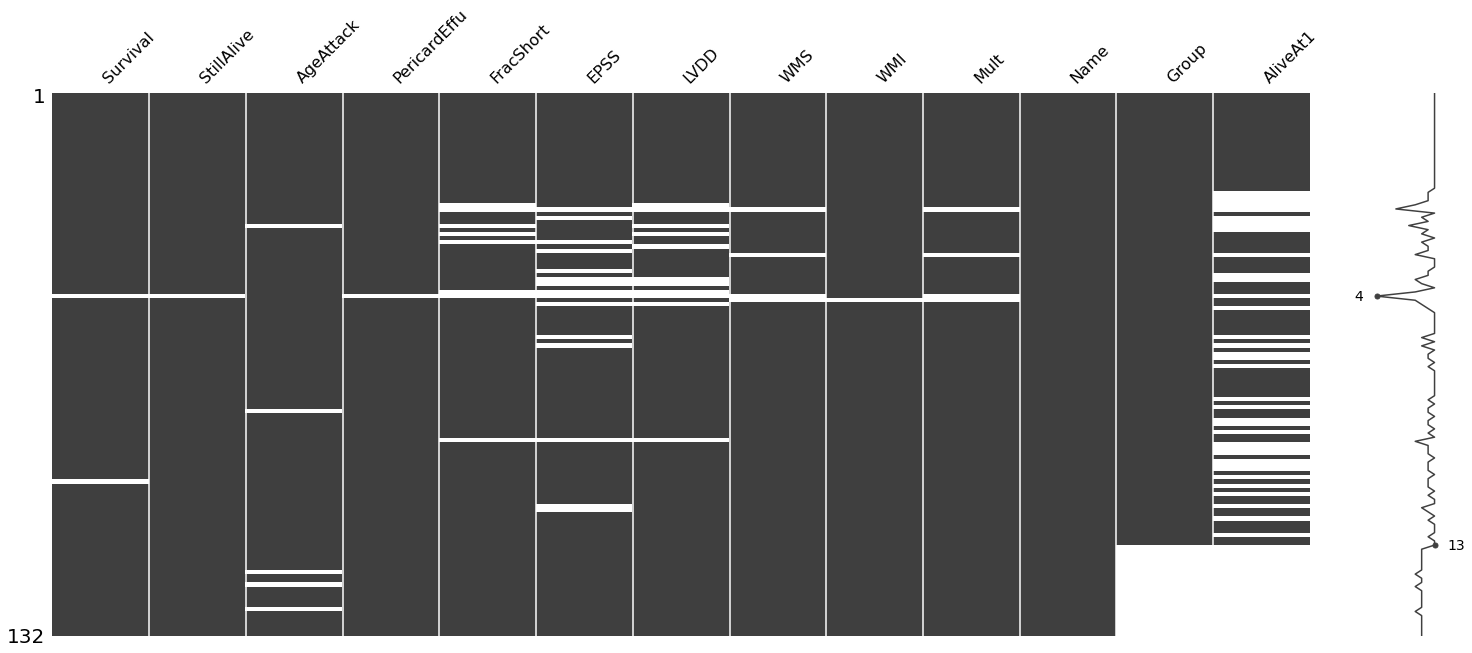

In [ ]:
mi.matrix(datos)

In [ ]:
datos.iloc[[84]]

,Survival,StillAlive,AgeAttack,PericardEffu,FracShort,EPSS,LVDD,WMS,WMI,Mult,Name,Group,AliveAt1
84,0.75,True,61,0,NaN,NaN,NaN,28.0,2.33,0.857,name,True,1
